In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [82]:
data = pd.read_csv('NLSY97_subset.csv', index_col=0)

In [6]:
data.shape

(2000, 95)

In [7]:
data.columns

Index(['EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE', 'AGEMBTH',
       'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF', 'HHBMONLY',
       'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC', 'MSA97NK',
       'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD', 'EDUCMAST',
       'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO', 'PRMONM', 'PRMONF',
       'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE', 'PRFSTYUN', 'PRFSTYPE',
       'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED', 'COHABIT', 'OTHSING',
       'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO', 'FAITHM', 'ASVABAR',
       'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO', 'ASVABCS', 'ASVABC',
       'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT', 'WEIGHT04', 'WEIGHT11', 'SF',
       'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE', 'REG97NC', 'REG97S',
       'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN', 'JOBS', 'HOURS', 'TENURE',
       'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS', 'CATSE', 'COLLBARG', 'URBAN',
       'REG

In [8]:
data.count

<bound method DataFrame.count of       EARNINGS   S  EXP  FEMALE  MALE  BYEAR  AGE  AGEMBTH   HHINC97  \
ID                                                                     
4275     18.50  12 9.71       0     1   1984   27    24.00 64,000.00   
4328     19.23  17 5.71       0     1   1982   29    32.00  6,000.00   
8763     39.05  14 9.94       0     1   1981   30    23.00 88,252.00   
8879     16.80  18 1.54       0     1   1983   28    30.00       NaN   
1994     36.06  15 2.94       0     1   1984   27    23.00 44,188.00   
...        ...  ..  ...     ...   ...    ...  ...      ...       ...   
2456     14.00   8 7.87       1     0   1982   29    19.00  6,000.00   
1119     14.83  18 1.92       1     0   1983   28    28.00 50,000.00   
3561     35.88  18 2.67       1     0   1984   27    29.00 77,610.00   
5980     25.48  16 4.71       1     0   1982   29    23.00 69,300.00   
6221     13.33  14 6.48       1     0   1984   27    30.00 40,020.00   

      POVRAT97  ...  URBAN  RE

In [9]:
data.head()

,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
ID,,,,,,,,,,,,,,,,,,,,,
4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",402.00,...,1,0,0,1,0,0,0,1,0,0
4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",38.00,...,2,0,0,1,0,0,1,0,0,0
8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",555.00,...,1,0,0,0,1,0,0,1,0,0
8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,NaN,...,1,0,1,0,0,0,1,0,0,0
1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",278.00,...,1,0,0,0,1,0,0,1,0,0


In [10]:
data.sort_values('EARNINGS', ascending = False)

,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
ID,,,,,,,,,,,,,,,,,,,,,
3084,132.89,20,4.17,0,1,1980,31,25.00,"80,000.00",427.00,...,1,0,0,0,1,0,1,0,0,0
3962,123.08,12,9.85,0,1,1983,28,25.00,"57,000.00",304.00,...,1,0,0,1,0,0,1,0,0,0
1124,100.00,10,7.25,0,1,1982,29,18.00,"6,190.00",39.00,...,1,1,0,0,0,0,0,1,0,0
1124,100.00,10,7.25,0,1,1982,29,18.00,"6,190.00",39.00,...,1,1,0,0,0,0,0,1,0,0
4445,96.15,16,8.35,0,1,1981,30,27.00,NaN,NaN,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,2.13,18,0.52,0,1,1983,28,21.00,"50,650.00",242.00,...,1,0,0,0,1,0,0,1,0,0
5884,2.13,12,11.31,1,0,1980,31,23.00,"54,400.00",224.00,...,1,0,0,1,0,0,0,1,0,0
5404,2.13,12,4.40,1,0,1983,28,30.00,"28,975.00",229.00,...,1,0,0,1,0,0,1,0,0,0


In [11]:
print(f'Any NaN values? {data.isna().values.any()}')

Any NaN values? True


In [12]:
clean = data.dropna(axis = 0)

In [13]:
print(f'Any duplicates? {clean.duplicated().values.any()}')

Any duplicates? True


In [14]:
clean.duplicated(keep = 'last')

ID
4275     True
1994     True
2788     True
3473    False
1239    False
        ...  
3897    False
2400    False
3018    False
1119    False
5980    False
Length: 657, dtype: bool

In [15]:
cleaner = clean.drop_duplicates()

In [16]:
cleaner.duplicated().values.any()

False

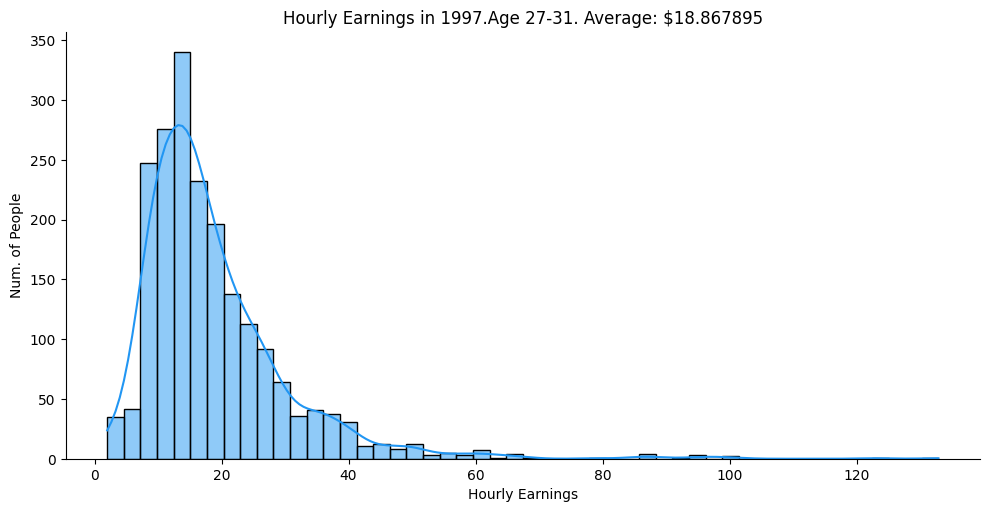

In [17]:
sns.displot(data['EARNINGS'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Hourly Earnings in 1997.Age 27-31. Average: ${(data.EARNINGS.mean())}')
plt.xlabel('Hourly Earnings')
plt.ylabel('Num. of People')

plt.show()

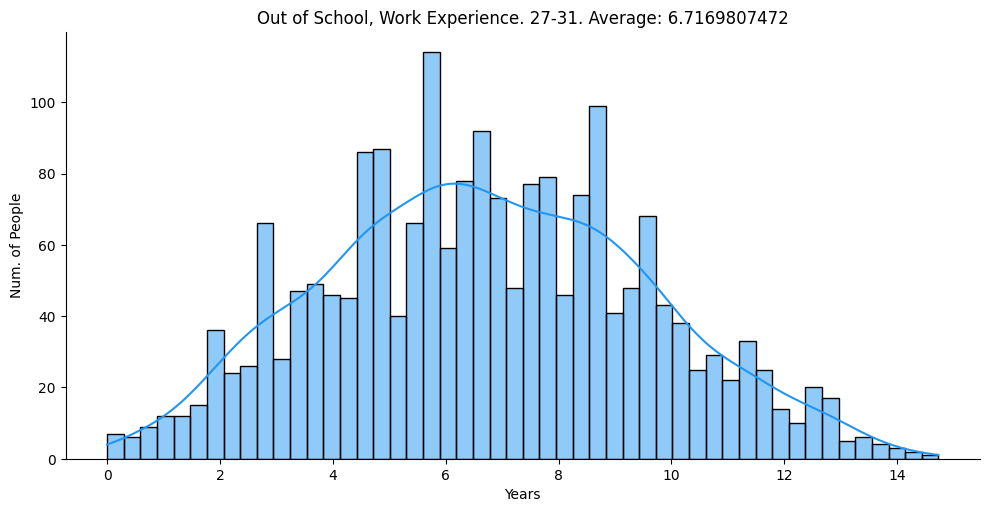

In [18]:
sns.displot(data['EXP'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Out of School, Work Experience. 27-31. Average: {(data.EXP.mean())}')
plt.xlabel('Years')
plt.ylabel('Num. of People')

plt.show()

In [19]:
young = data.loc[data['AGE'].isin([27,28])]

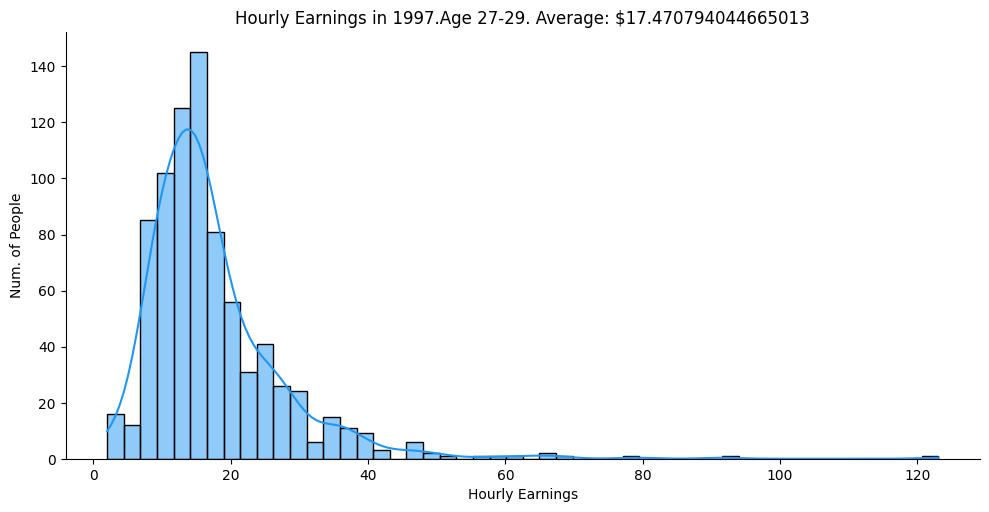

In [20]:
sns.displot(young['EARNINGS'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Hourly Earnings in 1997.Age 27-29. Average: ${(young.EARNINGS.mean())}')
plt.xlabel('Hourly Earnings')
plt.ylabel('Num. of People')

plt.show()

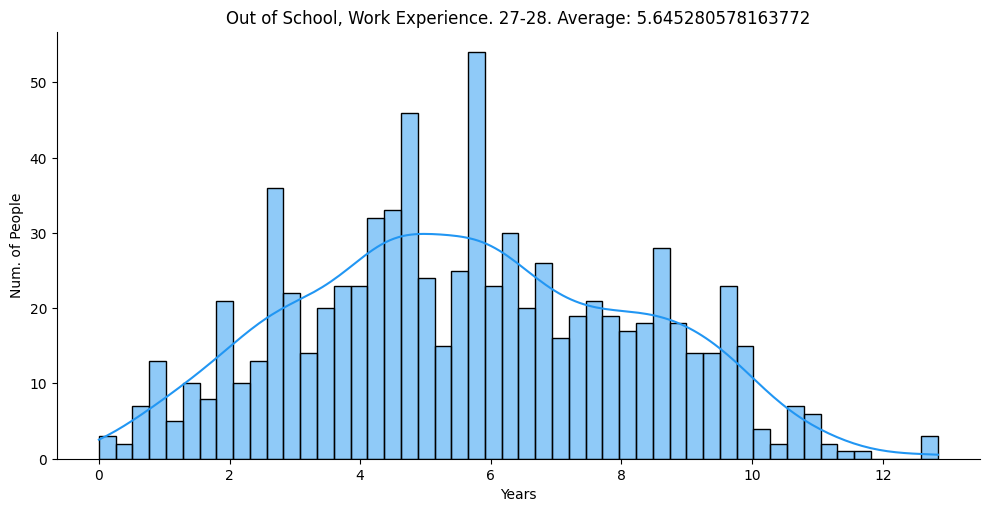

In [21]:
sns.displot(young['EXP'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Out of School, Work Experience. 27-28. Average: {(young.EXP.mean())}')
plt.xlabel('Years')
plt.ylabel('Num. of People')

plt.show()

Age of Mother at Person's Bith vs. Person's Earnings per. Hour

In [22]:
data = data.reset_index()

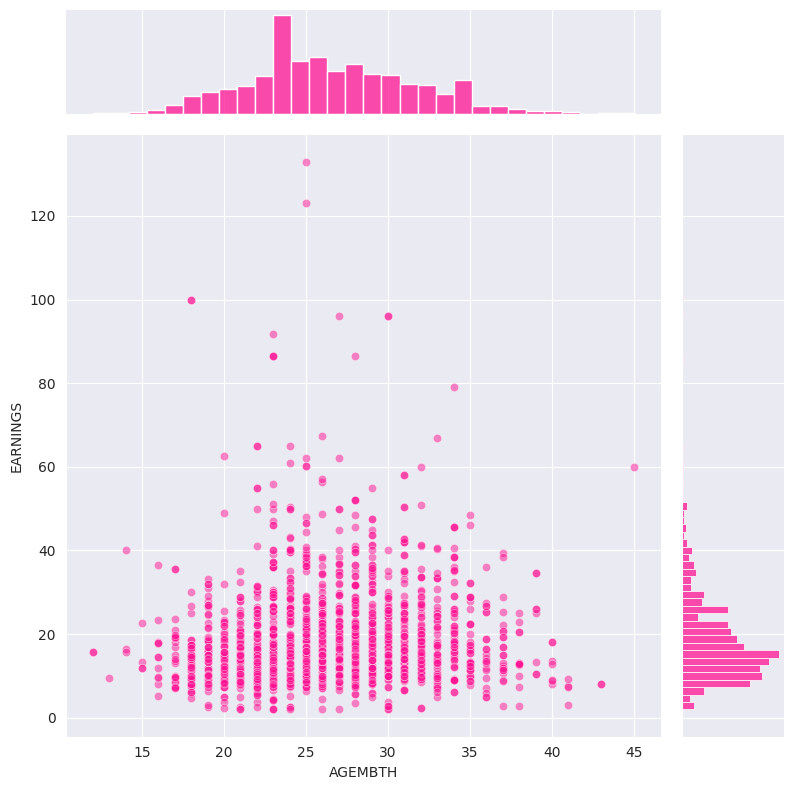

In [23]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['AGEMBTH'], 
                y=data['EARNINGS'], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

Years of Schooling vs. Earnings

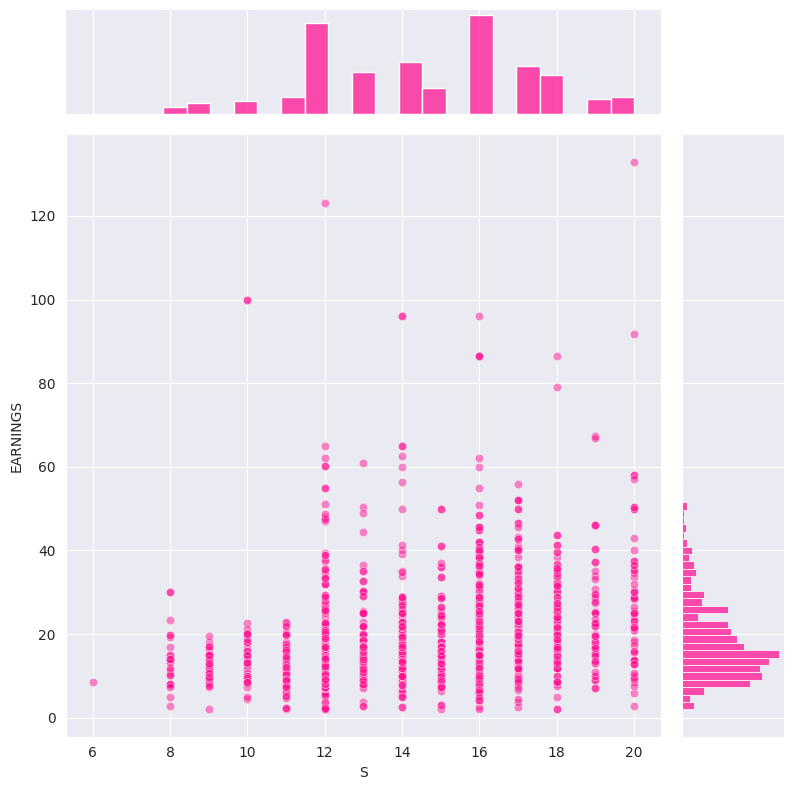

In [24]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['S'], 
                y=data['EARNINGS'], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

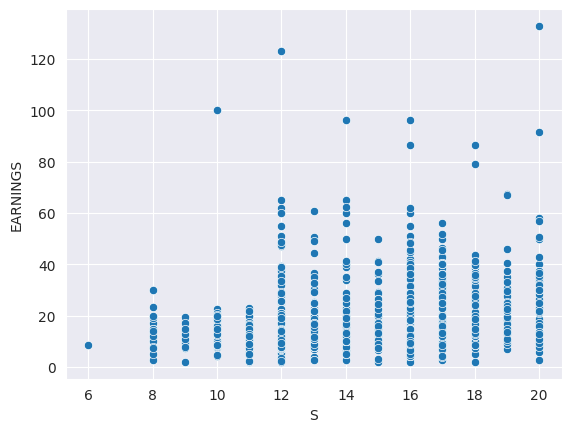

In [25]:
with sns.axes_style('darkgrid'):
  sns.scatterplot(x=data['S'], 
                y=data['EARNINGS'])

plt.show()

In [26]:
male = young = data.loc[data['MALE'].isin([1])]

Male Earnings

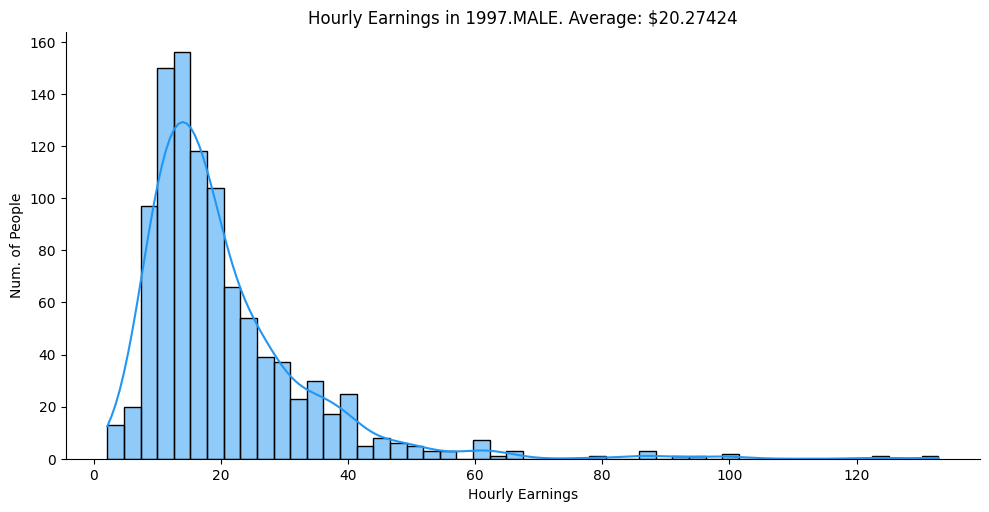

In [27]:
sns.displot(male['EARNINGS'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Hourly Earnings in 1997.MALE. Average: ${(male.EARNINGS.mean())}')
plt.xlabel('Hourly Earnings')
plt.ylabel('Num. of People')

plt.show()

Female Earnings

In [28]:
female = data.loc[data['MALE'].isin([0])]

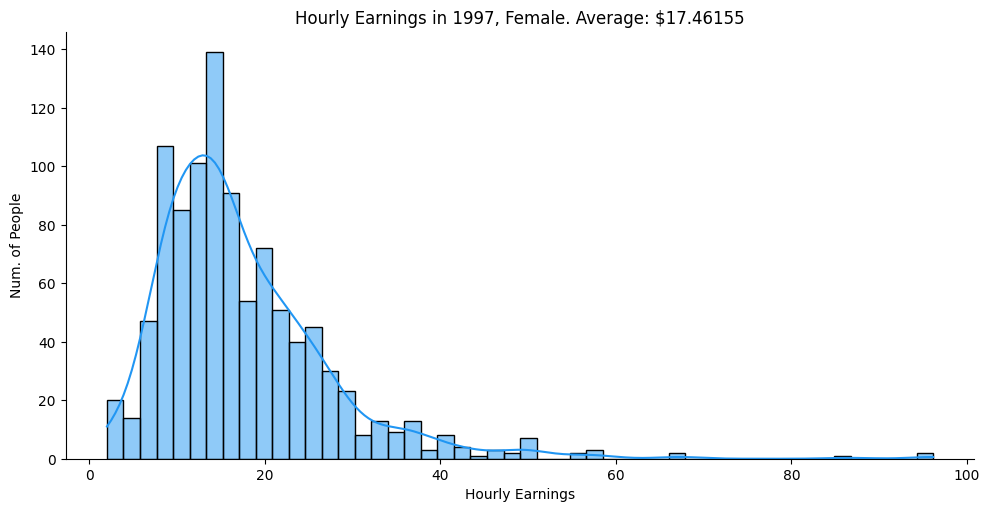

In [29]:
sns.displot(female['EARNINGS'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Hourly Earnings in 1997, Female. Average: ${(female.EARNINGS.mean())}')
plt.xlabel('Hourly Earnings')
plt.ylabel('Num. of People')

plt.show()

In [30]:
college = data.loc[data['EDUCBA'].isin([1])]
dropout = data.loc[data['EDUCDO'].isin([1])]

College vs HS dropout earnings


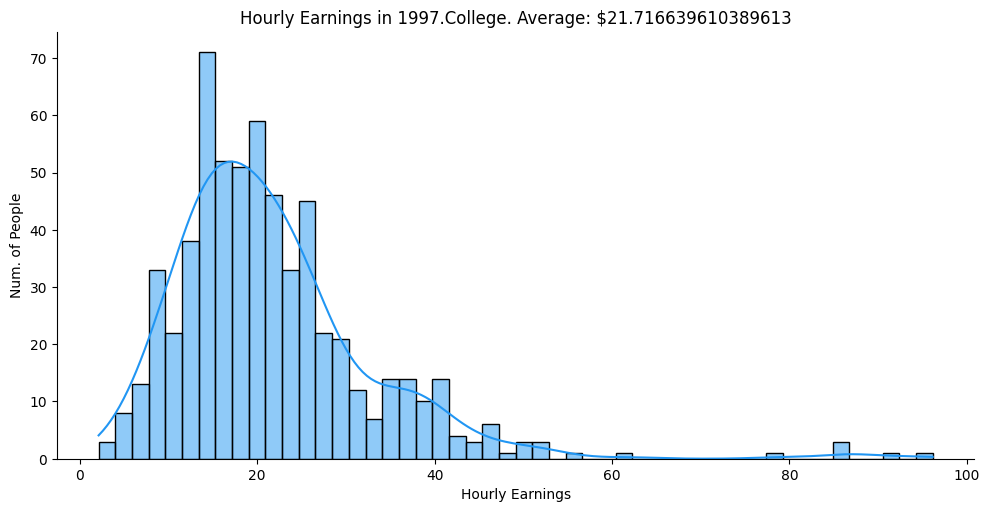

In [31]:
sns.displot(college['EARNINGS'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Hourly Earnings in 1997.College. Average: ${(college.EARNINGS.mean())}')
plt.xlabel('Hourly Earnings')
plt.ylabel('Num. of People')

plt.show()

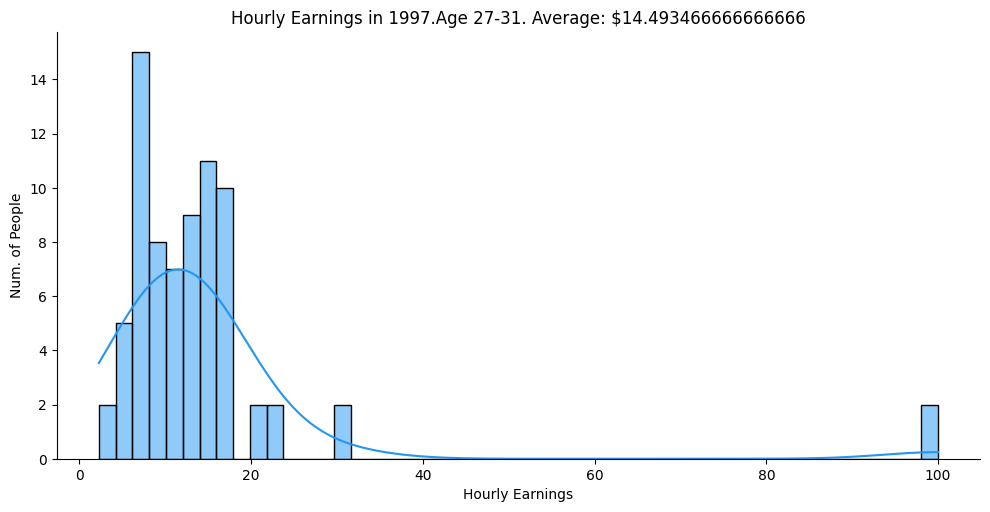

In [32]:
sns.displot(dropout['EARNINGS'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Hourly Earnings in 1997.Age 27-31. Average: ${(dropout.EARNINGS.mean())}')
plt.xlabel('Hourly Earnings')
plt.ylabel('Num. of People')

plt.show()

Educational comparison of earnings

In [33]:
newdata = [['Female', female['EARNINGS'].mean()],['Male', male['EARNINGS'].mean()],['College', college['EARNINGS'].mean()],['Dropout', dropout['EARNINGS'].mean()]]

newdf = pd.DataFrame(newdata, columns=['Name', 'Av. Earnings'])

newdf


,Name,Av. Earnings
0,Female,17.46
1,Male,20.27
2,College,21.72
3,Dropout,14.49


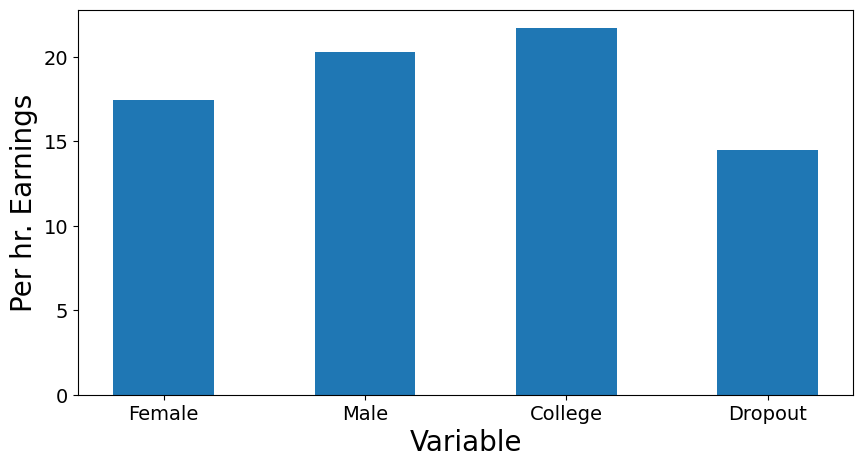

In [34]:
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Variable', fontsize=20)
plt.ylabel('Per hr. Earnings', fontsize=20)

plt.bar(newdf['Name'], newdf['Av. Earnings'], width = 0.5)

plt.show()

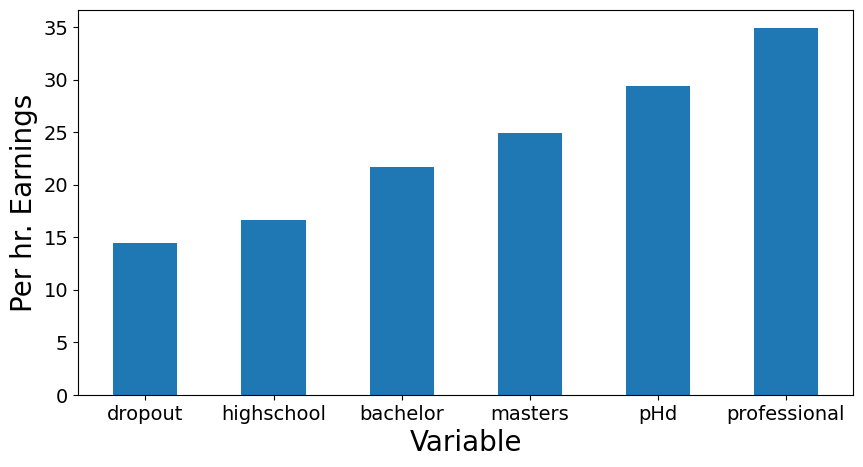

In [45]:
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Variable', fontsize=20)
plt.ylabel('Per hr. Earnings', fontsize=20)

y = [(data.loc[data['EDUCDO'].isin([1])]['EARNINGS'].mean()), (data.loc[data['EDUCHSD'].isin([1])]['EARNINGS'].mean()), (data.loc[data['EDUCBA'].isin([1])]['EARNINGS'].mean()), (data.loc[data['EDUCMAST'].isin([1])]['EARNINGS'].mean()), (data.loc[data['EDUCPHD'].isin([1])]['EARNINGS'].mean()), (data.loc[data['EDUCPROF'].isin([1])]['EARNINGS'].mean()) ]
x = ['dropout', 'highschool', 'bachelor', 'masters', 'pHd', 'professional']
plt.bar(x, y, width = 0.5)

plt.show()

In [57]:
target = data['EARNINGS']
features = data.drop('EARNINGS', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [70]:
regression = LinearRegression()

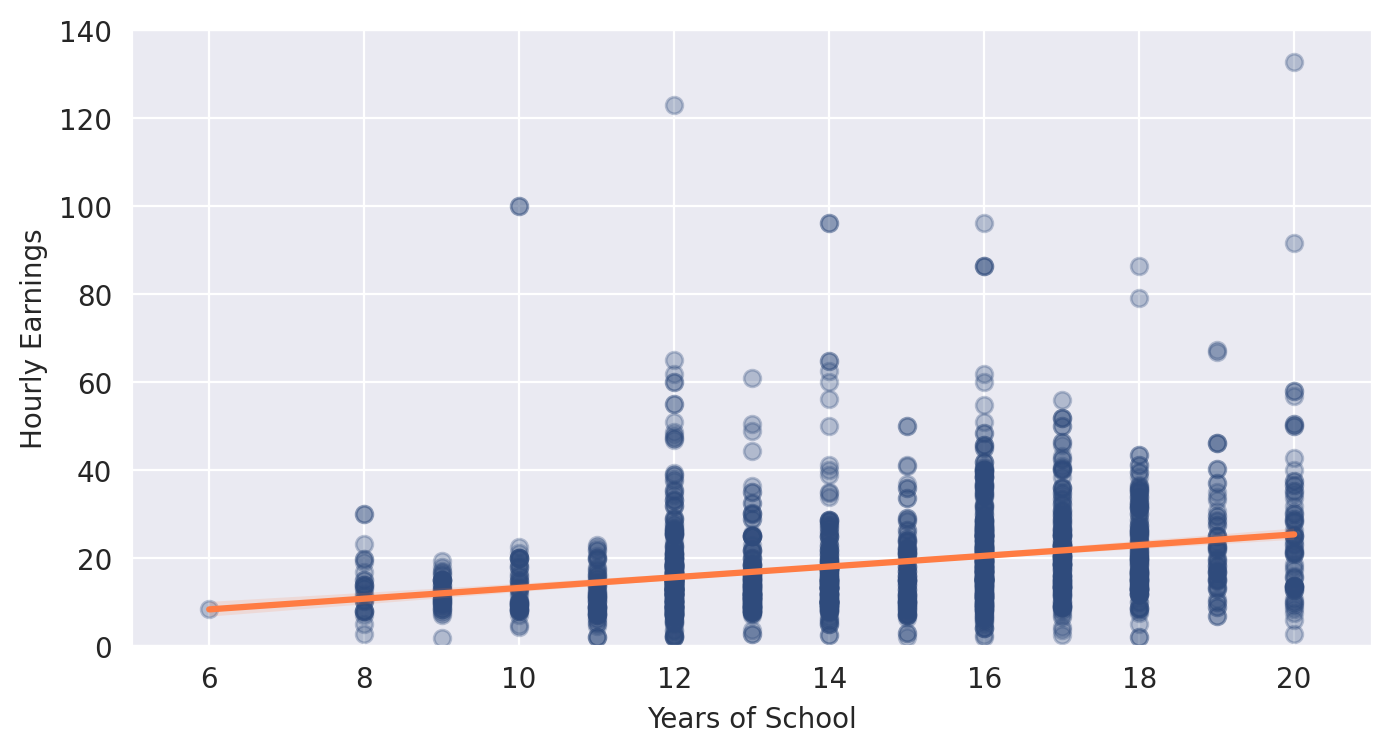

In [69]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=data,
                   x='S',
                   y='EARNINGS',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 140),
         xlim=(5, 21),
         ylabel='Hourly Earnings',
         xlabel='Years of School') 



In [71]:
X = pd.DataFrame(data, columns=['S'])
Y = pd.DataFrame(data, columns=['EARNINGS'])

In [73]:
regression.fit(X, Y)

LinearRegression()

In [74]:
regression.intercept_

array([1.11986684])

In [76]:
regression.coef_

array([[1.21736938]])

In [77]:
regression.score(X,Y)

0.07793379565415615

In [84]:
target = data['EARNINGS']
features = data[['S','EXP']]

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [85]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

In [92]:
regr.coef_

array([1.826992  , 0.95680635])

In [86]:
regr.fit(X_train, y_train)

LinearRegression()

In [88]:
rsquared = regr.score(X_train, y_train)
rsquared

0.11145477859925601

In [90]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
S,1.83
EXP,0.96


In [96]:
regr_intercept = pd.DataFrame(data=regr.intercept_, index=X_train.columns, columns=['Coefficient'])
regr_intercept

,Coefficient
S,-14.07
EXP,-14.07


In [ ]:

premium = regr_coef.loc['RM'].values[0] 

In [100]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

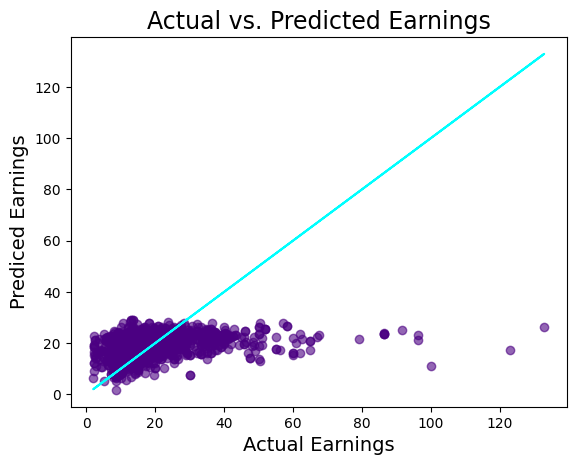

In [104]:
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs. Predicted Earnings', fontsize=17)
plt.xlabel('Actual Earnings', fontsize=14)
plt.ylabel('Prediced Earnings', fontsize=14)
plt.show()

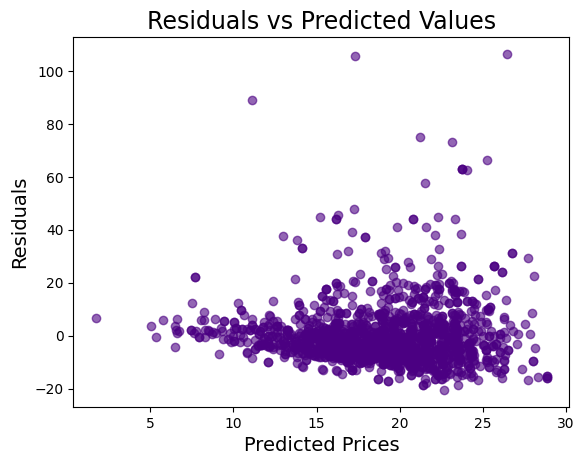

In [106]:
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

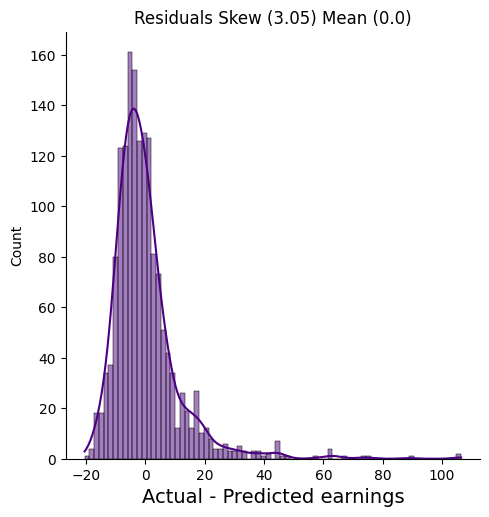

In [109]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.xlabel('Actual - Predicted earnings', fontsize=14)
plt.show()

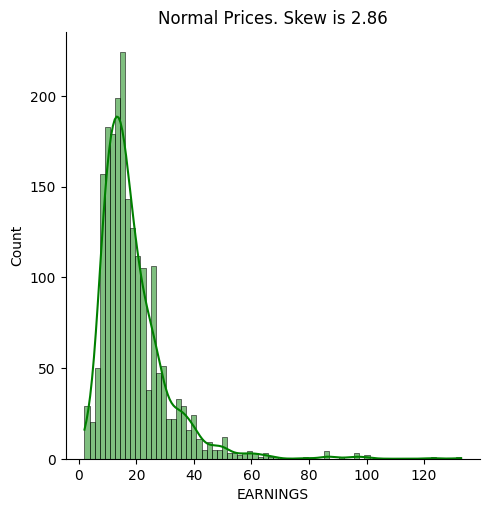

In [112]:
tgt_skew = data['EARNINGS'].skew()
sns.displot(data['EARNINGS'], kde='kde', color='green')
plt.title(f'Normal Earnings. Skew is {tgt_skew:.3}')
plt.show()

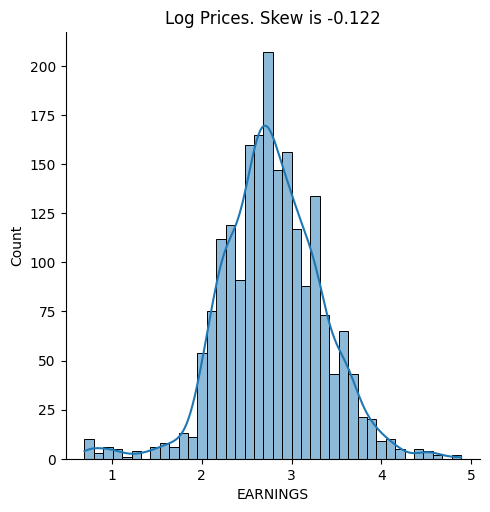

In [114]:
y_log = np.log(data['EARNINGS'])
sns.displot(y_log, kde=True)
plt.title(f'Log Earnings. Skew is {y_log.skew():.3}')
plt.show()

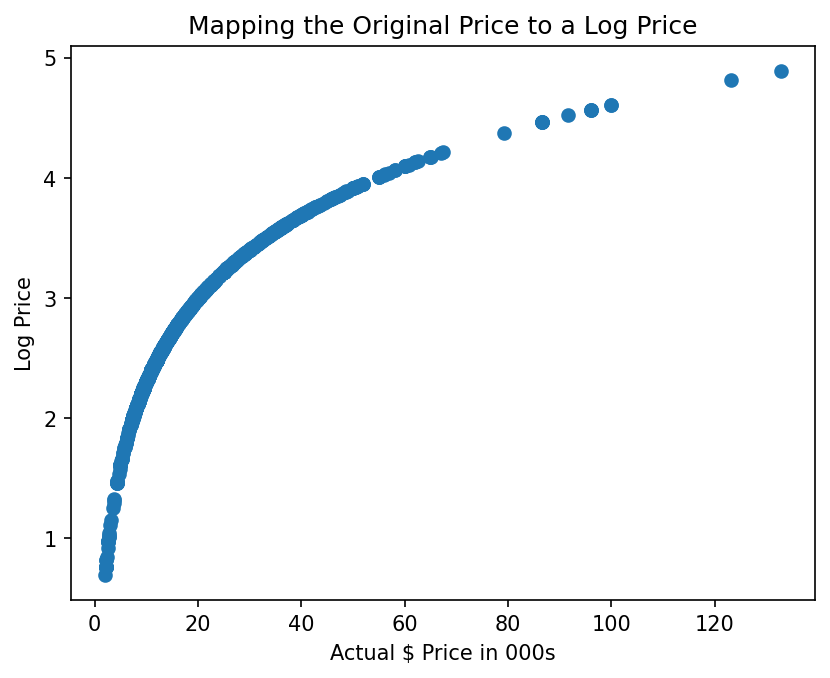

In [115]:
plt.figure(dpi=150)
plt.scatter(data.EARNINGS, np.log(data.EARNINGS))

plt.title('Mapping the Original Earning vs Log earning')
plt.ylabel('Log Earning')
plt.xlabel('Actual Earningss')
plt.show()

In [116]:
new_target = np.log(data['EARNINGS']) # Use log prices
features = data[['S','EXP']]

X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.16


In [117]:
log_regr.fit(X_train, log_y_train)

LinearRegression()

In [118]:
log_regr.coef_

array([0.09864606, 0.05329102])

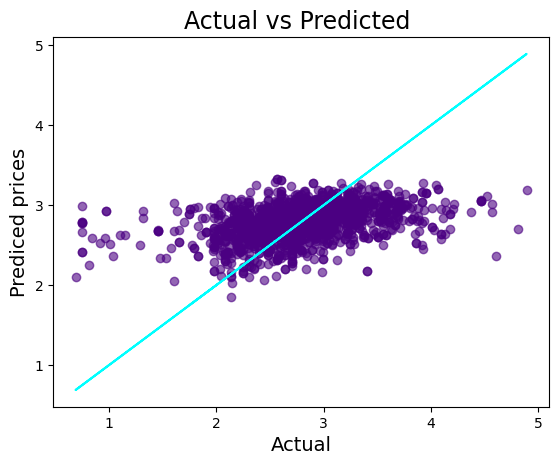

In [120]:
plt.figure(dpi=100)
plt.scatter(x=log_y_train, y=log_predictions, c='indigo', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted ', fontsize=17)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Prediced prices', fontsize=14)
plt.show()

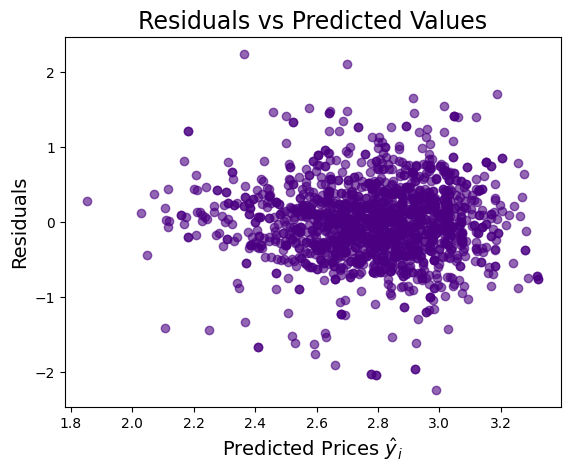

In [121]:
plt.figure(dpi=100)
plt.scatter(x=log_predictions, y=log_residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

In [122]:
print(f'Original Model Test Data r-squared: {regr.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {log_regr.score(X_test, log_y_test):.2}')

Original Model Test Data r-squared: 0.096
Log Model Test Data r-squared: 0.14
